In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()

Reading Swifter file param.swifter.in
Reading in time 1.000e+00
Creating Dataset
Successfully converted 1462 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()

Reading Swiftest file param.swiftest.in
Reading in time 1.001e+00
Creating Dataset
Successfully converted 1463 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestsim.ds - swiftersim.ds

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (y)'})

In [6]:
swiftdiff['dr'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['dv'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

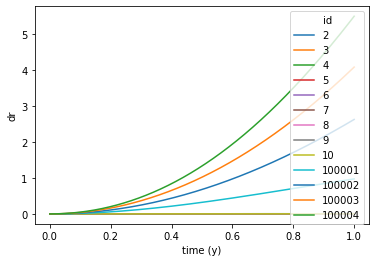

In [7]:
swiftdiff['dr'].plot.line(x="time (y)")

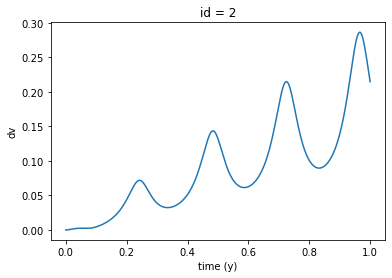

In [8]:
swiftdiff['dv'].sel(id=2).plot.line(x="time (y)")

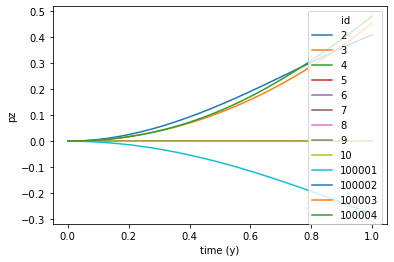

In [9]:
swiftdiff['pz'].plot.line(x="time (y)")

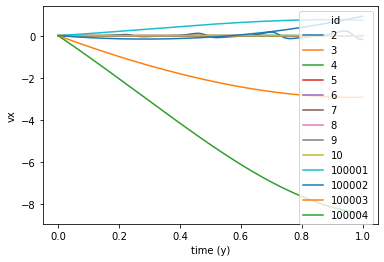

In [10]:
swiftdiff['vx'].plot.line(x="time (y)")

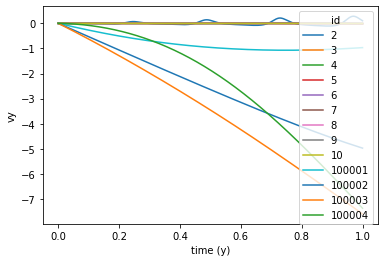

In [11]:
swiftdiff['vy'].plot.line(x="time (y)")

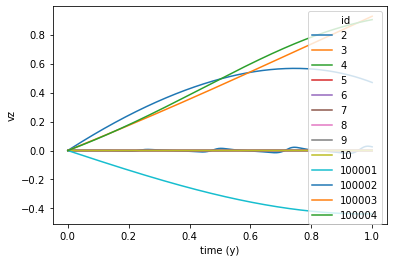

In [12]:
swiftdiff['vz'].plot.line(x="time (y)")